In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1 - Read file line-by-line

In [46]:
filepath = "surfaces/petrel_irapclassic_surf"

with open(filepath, "r") as file:  # opens the file at given filepath
    lines = file.readlines()  # read all lines from file, then store in list

In [47]:
print("# of lines:", len(lines), "\n")
print("first 10 lines:\n")
lines[:10]

# of lines: 1427 

first 10 lines:



['-996 88 50.000000 50.000000\n',
 '0 4800.0 0 4350.0\n',
 '97 0.000000 0 0\n',
 '0 0 0 0 0 0 0\n',
 '9999900.000000 9999900.000000 9999900.000000 9999900.000000 9999900.000000 9999900.000000\n',
 '9999900.000000 9999900.000000 9999900.000000 9999900.000000 9999900.000000 9999900.000000\n',
 '9999900.000000 9999900.000000 9999900.000000 9999900.000000 9999900.000000 9999900.000000\n',
 '9999900.000000 9999900.000000 9999900.000000 9999900.000000 9999900.000000 9999900.000000\n',
 '9999900.000000 9999900.000000 9999900.000000 9999900.000000 9999900.000000 9999900.000000\n',
 '9999900.000000 9999900.000000 9999900.000000 9999900.000000 9999900.000000 9999900.000000\n']

The above code loaded in every line of the file as a `str` (string) into a list of lines. We can immediately see that the first four lines are different from the rest. The first four lines correspond to the header, while the rest make up the regular grid. As we read in a normal "text" file (ascii file), each line has a `\n` at its end - which is the ascii code for end-ofline. Let's remove it:

In [48]:
for i, line in enumerate(lines):  # iterate over every line
    lines[i] = line.rstrip("\n")  # strip away the \n from the right of the string
    
lines[:10]

['-996 88 50.000000 50.000000',
 '0 4800.0 0 4350.0',
 '97 0.000000 0 0',
 '0 0 0 0 0 0 0',
 '9999900.000000 9999900.000000 9999900.000000 9999900.000000 9999900.000000 9999900.000000',
 '9999900.000000 9999900.000000 9999900.000000 9999900.000000 9999900.000000 9999900.000000',
 '9999900.000000 9999900.000000 9999900.000000 9999900.000000 9999900.000000 9999900.000000',
 '9999900.000000 9999900.000000 9999900.000000 9999900.000000 9999900.000000 9999900.000000',
 '9999900.000000 9999900.000000 9999900.000000 9999900.000000 9999900.000000 9999900.000000',
 '9999900.000000 9999900.000000 9999900.000000 9999900.000000 9999900.000000 9999900.000000']

In [49]:
file_header = lines[:4]
file_grid = lines[4:]

In [50]:
z_values = []  # this is going to be our storage list
for line in file_grid:  # iterate over every line in the grid part of the file
    line_values = line.split(" ")  # split current line into its separate values
                                   # with an empty space " " as delimiter
    for z_value in line_values: # iterate over every value in the line
        z_values.append(float(z_value))  # convert value from str into float
                                         # and append to our z_values list

Now that we have a consecutive list of all z-values in the grid stored in `z_values`, we can convert this consecutive list into a 2-D grid of z-values.

In [51]:
Z_grid = []  # empty storage list for our grid of z-values
for i in range(1, 88 + 1):  # loop from [1, 2, ..., 88]
    # take 88 rows of 97 values and store them as lists in our z_grid list 
    # we do some more involved indexing here
    # basically for our first i=1 the following index [(i - 1) * 97:i * 97] would
    # i=1: [0:97]
    # i=2: [91:194]
    # ...
    # i=88: [8439:8536]
    Z_grid.append(z_values[(i - 1) * 97:i * 97])
# afterwards we convert our "2-D list" into a 2-D numpy array:
Z_grid =  np.array(z_grid)

In [52]:
Z_grid.shape

(88, 97)

The z_grid array now is a 2-D array of 88 rows and 97 columns. We can plot it easily as a "black and white" image using matplotlib's `imshow` function:

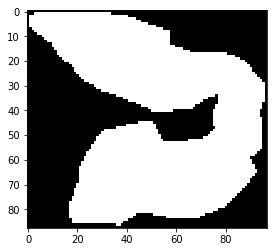

In [53]:
plt.imshow(Z_grid, cmap="Greys")

Now we need to create our X and Y grids to associate with the Z values. For this we need the X and Y extent of the grid, which we can load from the second row of our file (stored in the header list):

In [54]:
extent = [float(val) for val in file_header[1].split(" ")]
extent

[0.0, 4800.0, 0.0, 4350.0]

In [55]:
grid_parameters = [float(val) for val in file_header[0].split(" ")]
grid_parameters

[-996.0, 88.0, 50.0, 50.0]

In [56]:
x_coords = np.arange(88) * grid_parameters[2] + extent[0]
y_coords = np.arange(97) * grid_parameters[3] + extent[2]

In [57]:
X_grid, Y_grid = np.meshgrid(y_coords, x_coords)

In [58]:
X_grid.shape

(88, 97)

Now we can stack the grids of X, Y and Z values together into a 3-D array:

In [59]:
stacked_grid = np.stack((X_grid, Y_grid, Z_grid), axis=0)
stacked_grid.shape

(3, 88, 97)

And then reshape the array from 3-D into a 2-D array where every row corresponds to a single grid points with three columns containing the x, y and z values:

In [60]:
points = stacked_grid.reshape((3, 88*97)).T
points

array([[0.0000e+00, 0.0000e+00, 9.9999e+06],
       [5.0000e+01, 0.0000e+00, 9.9999e+06],
       [1.0000e+02, 0.0000e+00, 9.9999e+06],
       ...,
       [4.7000e+03, 4.3500e+03, 9.9999e+06],
       [4.7500e+03, 4.3500e+03, 9.9999e+06],
       [4.8000e+03, 4.3500e+03, 9.9999e+06]])

Now we can remove all the nan-values (9999900.000000) which represent grid points without any real data:

We can conveniently create a boolean filter for out z-values: We want to get rid of all nan-values and keep the rest. For this we make a boolean expression of checking our z-values stored in `points[:,2]` (third column of points array) if they are *not* equal to the nan-value of 9999900.000000:

In [61]:
boolean_filter = points[:,2] != 9999900.000000
boolean_filter

array([False, False, False, ..., False, False, False])

We can than use this boolean filter on our points array:

In [62]:
filtered_points = points[boolean_filter, :]
filtered_points

array([[ 150.      ,   50.      , 1840.032349],
       [ 200.      ,   50.      , 1827.689697],
       [ 250.      ,   50.      , 1810.294434],
       ...,
       [1900.      , 4250.      , 1778.41272 ],
       [1800.      , 4300.      , 1786.391479],
       [1850.      , 4300.      , 1782.213745]])

And now plot our final result using a scatterplot of all points, colored by their z-values:

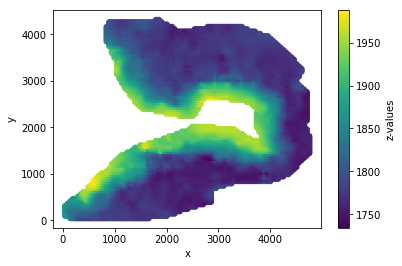

In [63]:
im = plt.scatter(filtered_points[:,0], filtered_points[:,1], 
                 c=filtered_points[:,2], cmap="viridis")

plt.colorbar(im, label="z-values")
plt.xlabel("x")
plt.ylabel("y");